In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

In [63]:
arr = os.listdir('/home/luan/Documents/repositorio/bechmarkArango/')
single = list()
cluster = list();
single200 = 0;
single500 = 0;
single800 = 0;
single1200 = 0;
cluster200 = 0;
cluster500 = 0;
cluster800 = 0;
cluster1200 = 0;
#[UPDATE-FAILED], Operations, 
fsingle = list()
fcluster = list();
fsingle200 = 0;
fsingle500 = 0;
fsingle800 = 0;
fsingle1200 = 0;
fcluster200 = 0;
fcluster500 = 0;
fcluster800 = 0;
fcluster1200 = 0;

for filename in arr:
    if filename != ".git":
        f = open("/home/luan/Documents/repositorio/bechmarkArango/" + filename, "r")
        data = f.read()
        throught = float(data.split("Throughput(ops/sec), ")[1].split("[TOTAL_GCS_G1_Young_Generation]")[0].strip())
        #print(throught)
        if "single" in filename:
            if "-200" in filename:
                single200 += throught
            if "500" in filename:
                single500 += throught
            if "800" in filename:
                single800 += throught
            if "1200" in filename:
                single1200 += throught
        if "cluster" in filename:
            if "-200" in filename:
                cluster200 += throught
            if "500" in filename:
                cluster500 += throught
            if "800" in filename:
                cluster800 += throught
            if "1200" in filename:
                cluster1200 += throught

        if data.count("[UPDATE-FAILED]"):
            
            fail = float(data.split("[UPDATE-FAILED], Operations, ")[1].split("[UPDATE-FAILED], AverageLatency(us)")[0].strip())
        else :
            print("n entrou")
            fail = 0
        
        if "single" in filename:
            if "-200" in filename:
                fsingle200 += fail
            if "500" in filename:
                fsingle500 += fail
            if "800" in filename:
                fsingle800 += fail
            if "1200" in filename:
                fsingle1200 += fail
        if "cluster" in filename:
            if "-200" in filename:
                fcluster200 += fail
            if "500" in filename:
                fcluster500 += fail
            if "800" in filename:
                fcluster800 += fail
            if "1200" in filename:
                fcluster1200 += fail
                
single.append(single200 / 5);
single.append(single500 / 5);
single.append(single800 / 5);
single.append(single1200 / 5);

cluster.append(cluster200 / 5);
cluster.append(cluster500 / 5);
cluster.append(cluster800 / 5);
cluster.append(cluster1200 / 5);

fsingle.append(fsingle200 / 5);
fsingle.append(fsingle500 / 5);
fsingle.append(fsingle800 / 5);
fsingle.append(fsingle1200 / 5);

fcluster.append(fcluster200 / 5);
fcluster.append(fcluster500 / 5);
fcluster.append(fcluster800 / 5);
fcluster.append(fcluster1200 / 5);
        
print(fcluster)
print(fsingle)
        
#print(arr)

#f = open("/home/luan/Documents/repositorio/bechmarkArango/", "r")
#    for x in f:
#        print(x)

#dados = list()
#append

[883.8, 994.0, 1257.2, 1165.2]
[1384.8, 2177.4, 2567.8, 2898.4]


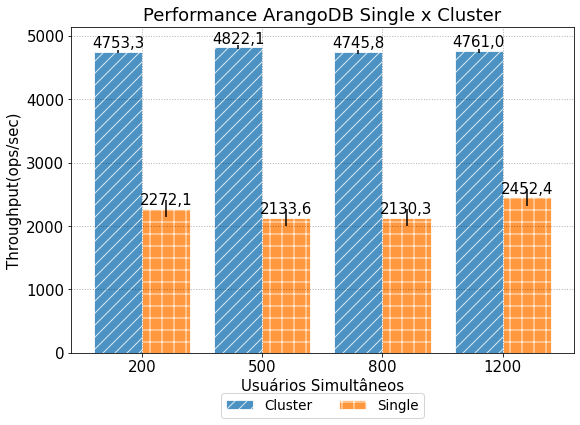

In [66]:
font = {
    #'weight' : 'bold',
    'size'   : 15
}
figsize = (9,6)
patterns = ('//', '+', 'x', '.', '\\', 'o', '-', '||')
opacity = 0.8

mpl.rc('font', **font)

labels = ['200','500','800','1200']
#Ygirls = [10,20,20,40]
#Zboys = [20,30,25,30]
  
#X_axis = np.arange(len(X))
  
#plt.bar(X_axis - 0.2, cluster, 0.4, label = 'Cluster')
#plt.bar(X_axis + 0.2, single, 0.4, label = 'Single')
  
#plt.xticks(X_axis, X)
#plt.xlabel("Usuários Simultâneos")
#plt.ylabel("Throughput(ops/sec)")
#plt.title("Performance ArangoDB Single x Cluster")
#plt.legend()


#labels = ['2', '4', '6', '8', '10']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=figsize)
clusterbar = ax.bar(x - 0.2, cluster, width, yerr=np.std(cluster), label='Cluster', alpha=opacity, hatch=patterns[0], edgecolor='w')
singlebar = ax.bar(x + 0.2, single, width, yerr=np.std(single), label='Single', alpha=opacity, hatch=patterns[1], edgecolor='w')

#plt.yscale('log')
ax.set_ylim(top=ax.get_ylim()[1]*1.01) # +1% de margem superior pra caber o texto em cima das barras
#ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Usuários Simultâneos')
ax.set_ylabel('Throughput(ops/sec)')
ax.set_title('Performance ArangoDB Single x Cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=3,
    fontsize=font['size']*0.9, # 90% do tamanho da fonte do restante
)
ax.grid(b=True, which='major', color='k', alpha=0.3, linestyle=':', linewidth=1)

def autolabel(rects):
    for rect in rects:  
        height = rect.get_height()
        ax.annotate(str('%.1f' % height).replace(".", ","),
                    xy=(rect.get_x() + rect.get_width() / 2, height +3),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(clusterbar)
autolabel(singlebar)
#plt.yticks(np.arange(0, 250, 20))
fig.savefig("desempenho.pdf", bbox_inches="tight")

#plt.show()

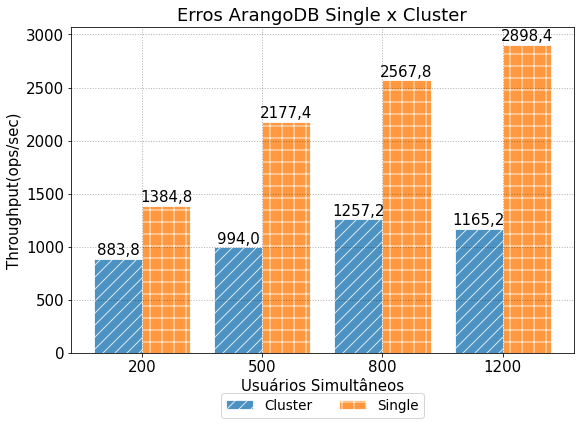

In [67]:
font = {
    #'weight' : 'bold',
    'size'   : 15
}
figsize = (9,6)
patterns = ('//', '+', 'x', '.', '\\', 'o', '-', '||')
opacity = 0.8

mpl.rc('font', **font)

labels = ['200','500','800','1200']

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=figsize)
clusterbar = ax.bar(x - 0.2, fcluster, width, label='Cluster', alpha=opacity, hatch=patterns[0], edgecolor='w')
singlebar = ax.bar(x + 0.2, fsingle, width, label='Single', alpha=opacity, hatch=patterns[1], edgecolor='w')

#plt.yscale('log')
ax.set_ylim(top=ax.get_ylim()[1]*1.01) # +1% de margem superior pra caber o texto em cima das barras
#ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Usuários Simultâneos')
ax.set_ylabel('Throughput(ops/sec)')
ax.set_title('Erros ArangoDB Single x Cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=3,
    fontsize=font['size']*0.9, # 90% do tamanho da fonte do restante
)
ax.grid(b=True, which='major', color='k', alpha=0.3, linestyle=':', linewidth=1)

def autolabel(rects):
    for rect in rects:  
        height = rect.get_height()
        ax.annotate(str('%.1f' % height).replace(".", ","),
                    xy=(rect.get_x() + rect.get_width() / 2, height +3),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(clusterbar)
autolabel(singlebar)
#plt.yticks(np.arange(0, 250, 20))
fig.savefig("erros.pdf", bbox_inches="tight")

#plt.show()